In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif



def load_data():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter=',' 
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(file_path_labels, delimiter=delimiter, header=0, quotechar='"')
    return df_data, df_labels 

def standardize(train_data, test_data):
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.transform(test_data)
    return train_data, test_data


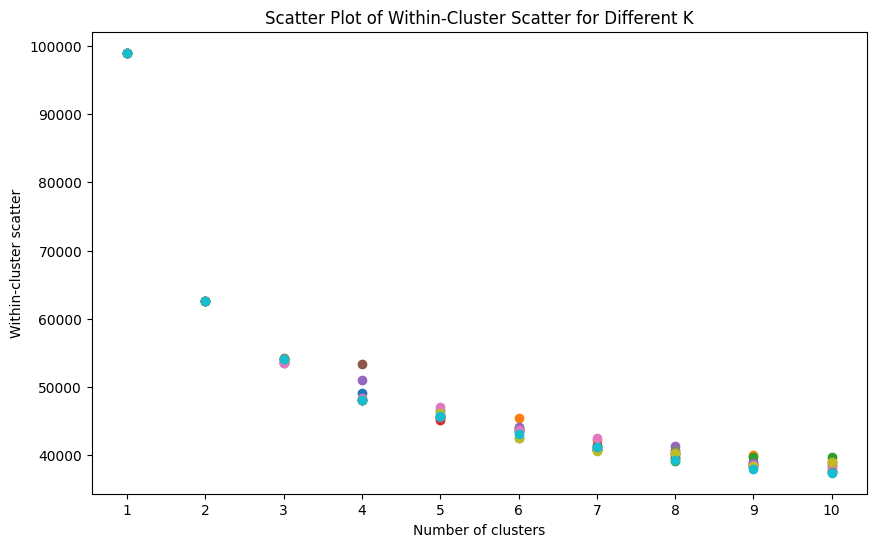

In [43]:
#Cluster the data set. Do the clusters agree with the class labels? Does changing the number of clusters 
#have an impact on the overlap with the class labels?
#What characteristics of the data does the clustering pick up?
#Please think carefully about how you go about this question - how do you choose your input 
#(e.g. do you perform preprocessing or not) to the clustering algorithm? what method and settings? 
#Is it as clear cut how to make these choices if you didn't know the labels?

def compute_wcss(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
#pca = PCA(n_components=25)  
#data = pca.fit_transform(data)
anova = SelectKBest(score_func=f_classif, k=400)
data = anova.fit_transform(data, labels.values.ravel())

k_range = range(1, 11)
num_iterations = 10
# Perform the process several times and store the results
results = []
for _ in range(num_iterations):
    wcss_values = [compute_wcss(data, k) for k in k_range]
    results.append(wcss_values)

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the scatter plot for each iteration
plt.figure(figsize=(10, 6))
for i in range(num_iterations):
    plt.scatter(k_range, results[i], marker='o', label=f'Iteration {i+1}')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster scatter')
plt.title('Scatter Plot of Within-Cluster Scatter for Different K')
plt.xticks(np.arange(1, 11, 1))
plt.show()

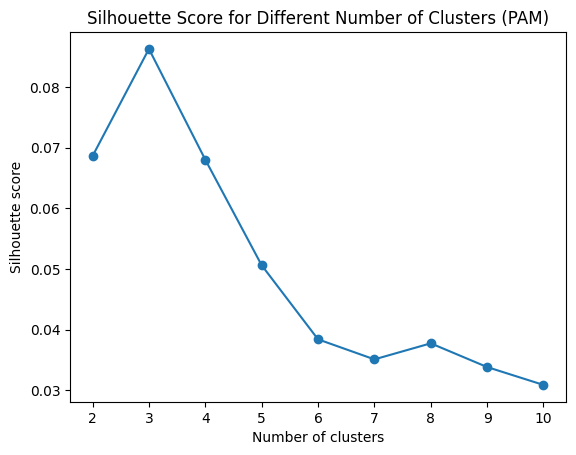

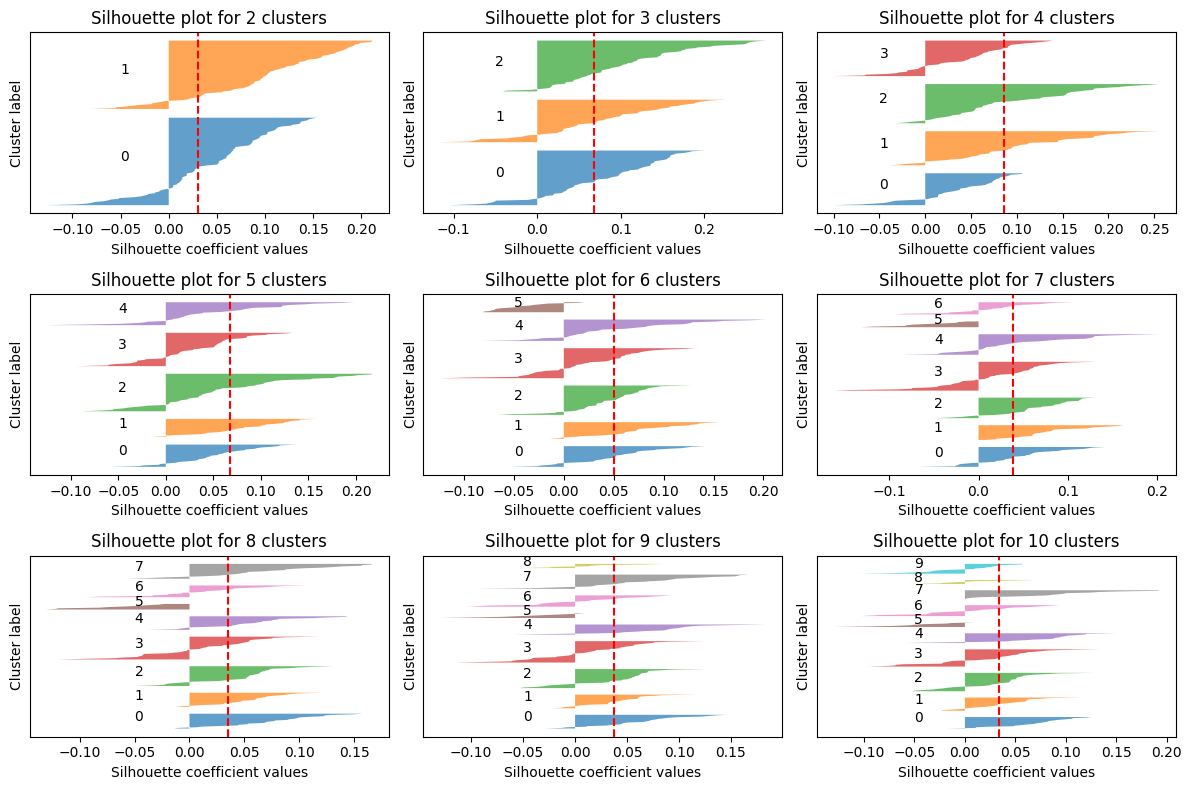

In [9]:

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, silhouette_samples

data, labels = load_data()
# Range of clusters to test
k_range = range(2, 11)

# Perform KMedoids clustering for different values of k and compute silhouette scores
silhouette_scores = []
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    cluster_labels = kmedoids.fit_predict(data.values)
    silhouette_avg = silhouette_score(data.values, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Number of Clusters (PAM)')
plt.xticks(np.arange(2, 11, 1))
plt.show()

# Plot silhouette samples for each observation
plt.figure(figsize=(12, 8))
for i, k in enumerate(k_range, start=1):
    plt.subplot(3, 3, i)
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    cluster_labels = kmedoids.fit_predict(data.values)
    silhouette_values = silhouette_samples(data.values, cluster_labels)

    y_lower = 10
    for j in range(k):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_scores[i - 2], color="red", linestyle="--")
    plt.yticks([])
    plt.title(f'Silhouette plot for {k} clusters')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')

plt.tight_layout()
plt.show()

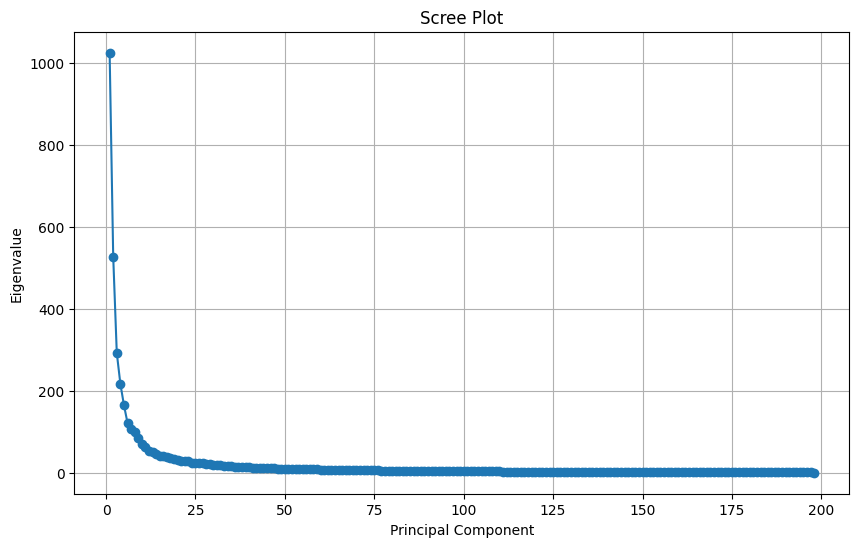

In [10]:
data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
pca = PCA()
pca.fit(data)

# Get eigenvalues
eigenvalues = pca.explained_variance_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

Cluster: 1
% cats: 0.30158730158730157, % dogs: 0.6984126984126984


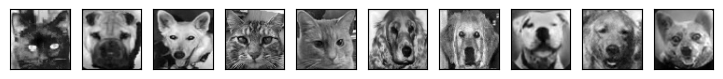

Cluster: 2
% cats: 0.8378378378378378, % dogs: 0.16216216216216217


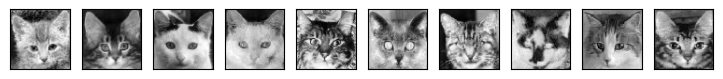

Cluster: 3
% cats: 0.6304347826086957, % dogs: 0.3695652173913043


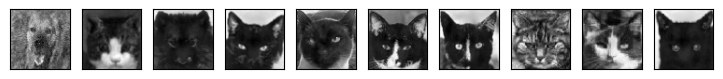

Cluster: 4
% cats: 0.34615384615384615, % dogs: 0.6538461538461539


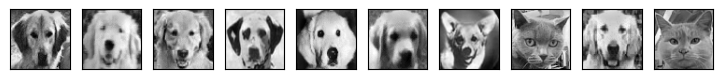

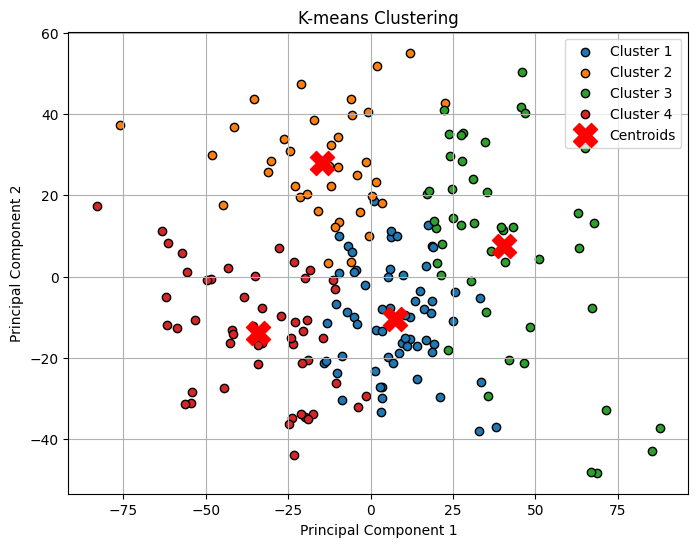

In [16]:
#Cluster the data set. Do the clusters agree with the class labels? Does changing the number of clusters 
#have an impact on the overlap with the class labels?
#What characteristics of the data does the clustering pick up?
#Please think carefully about how you go about this question - how do you choose your input 
#(e.g. do you perform preprocessing or not) to the clustering algorithm? what method and settings? 
#Is it as clear cut how to make these choices if you didn't know the labels?

data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
pca = PCA(n_components=25)  
X_pca = pca.fit_transform(data)
num_clusters = 4
num_img = 10 
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(X_pca)

for i in range(num_clusters):
    print(f'Cluster: {i+1}')
    per_class_ind = np.where(cluster_labels == i)[0]
    per_class_data = data[per_class_ind] 
    num_cats = np.count_nonzero(labels.values.ravel()[per_class_ind] == 0)
    num_dogs = np.count_nonzero(labels.values.ravel()[per_class_ind] == 1)
    print(f'% cats: {num_cats / (num_cats + num_dogs)}, % dogs: {num_dogs / (num_cats + num_dogs)}')
    plt.figure(figsize=(10,5))
    for j in range(min(len(per_class_data), num_img)): 
        plt.subplot(1,min(len(per_class_data), num_img)+1,j+1)
        plt.imshow(per_class_data[j].reshape(64, 64).T, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()


# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1], label=f'Cluster {label+1}', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

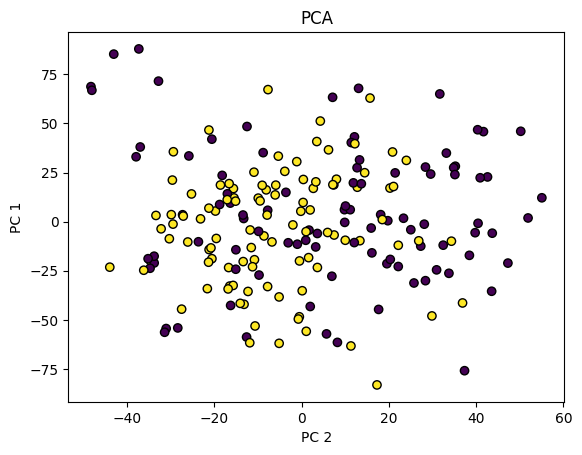

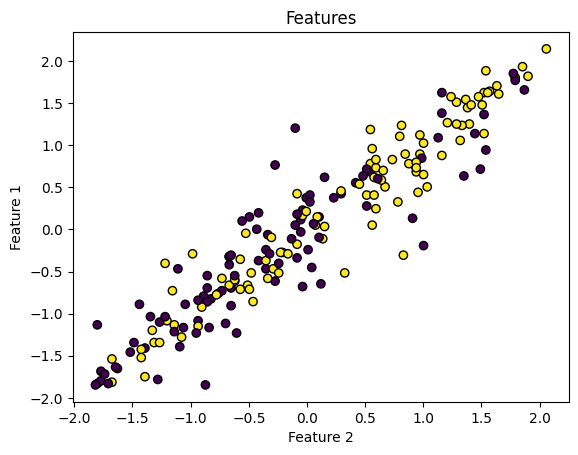

In [37]:

data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
pca = PCA(n_components=25)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(data)

for i in range(2):
    for j in range(1):
        if i == j:
            continue
        plt.scatter(X_pca[:, i], X_pca[:, j], c=labels.values, cmap='viridis', edgecolor='k')
        plt.xlabel(f'PC {i+1}')
        plt.ylabel(f'PC {j+1}')
        plt.title('PCA')
        plt.show()
        
data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
anova = SelectKBest(score_func=f_classif, k=400)
data_fs = anova.fit_transform(data, labels.values.ravel())

for i in range(2):
    for j in range(1):
        if i == j:
            continue
        plt.scatter(data_fs[:, i], data_fs[:, j], c=labels.values, cmap='viridis', edgecolor='k')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel(f'Feature {j+1}')
        plt.title('Features')
        plt.show()
    

Cluster: 1
% cats: 0.47761194029850745, % dogs: 0.5223880597014925


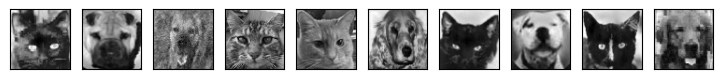

Cluster: 2
% cats: 0.8305084745762712, % dogs: 0.1694915254237288


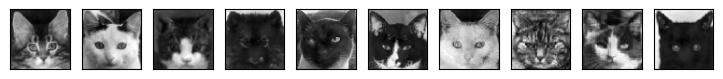

Cluster: 3
% cats: 0.2222222222222222, % dogs: 0.7777777777777778


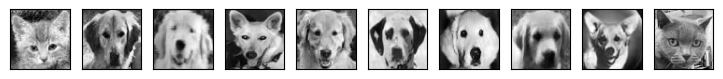

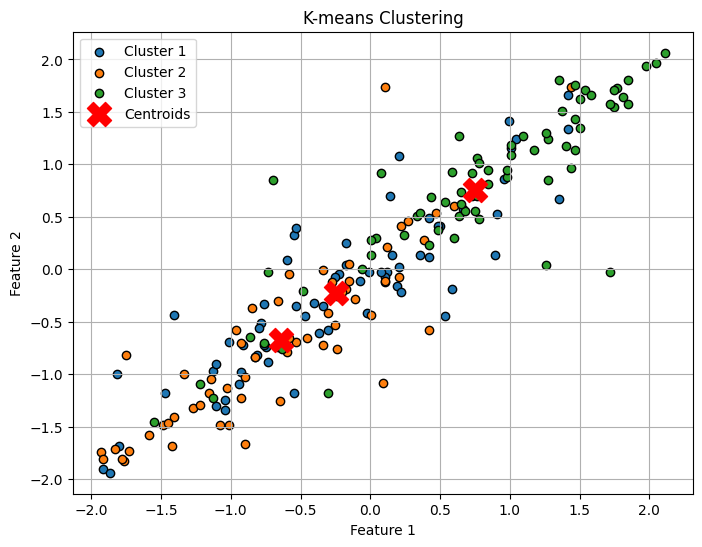

In [38]:
data, labels = load_data()
sc = StandardScaler()
data = sc.fit_transform(data.values)
anova = SelectKBest(score_func=f_classif, k=500)
data_fs = anova.fit_transform(data, labels.values.ravel())
num_clusters = 3
num_img = 10 
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(data_fs)

for i in range(num_clusters):
    print(f'Cluster: {i+1}')
    per_class_ind = np.where(cluster_labels == i)[0]
    per_class_data = data[per_class_ind] 
    num_cats = np.count_nonzero(labels.values.ravel()[per_class_ind] == 0)
    num_dogs = np.count_nonzero(labels.values.ravel()[per_class_ind] == 1)
    print(f'% cats: {num_cats / (num_cats + num_dogs)}, % dogs: {num_dogs / (num_cats + num_dogs)}')
    plt.figure(figsize=(10,5))
    for j in range(min(len(per_class_data), num_img)): 
        plt.subplot(1,min(len(per_class_data), num_img)+1,j+1)
        plt.imshow(per_class_data[j].reshape(64, 64).T, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()


# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    plt.scatter(data_fs[cluster_labels == label, 0], data_fs[cluster_labels == label, 1], label=f'Cluster {label+1}', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()